### Перцептрон  
#### Цель работы  
Познакомиться с перцептроном как с моделью обучения с учителем в библиотеке sklearn.  

#### Содержание работы  
Сгенерируйте данные и обучите на них модель перцептрона.  
Просмотрите параметры модели, визуализируйте и улучшите ее работу.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

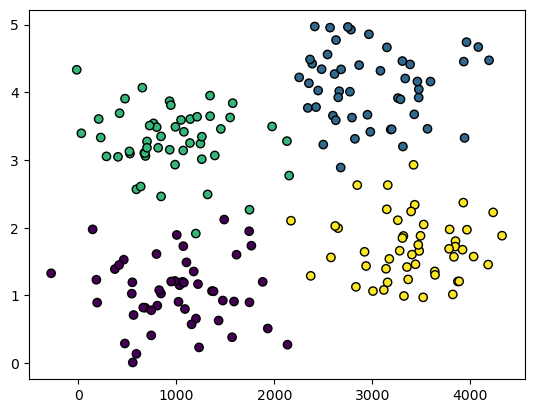

In [2]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [3]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

In [4]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [5]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [6]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [7]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]], dtype=int64)

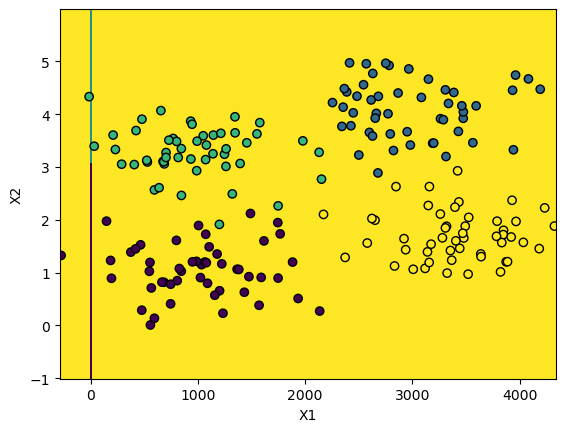

In [8]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [10]:
clf1 = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X_scaled, y)

c:\Users\Sofia\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [11]:
confusion_matrix(y, clf1.predict(X_scaled))

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]], dtype=int64)

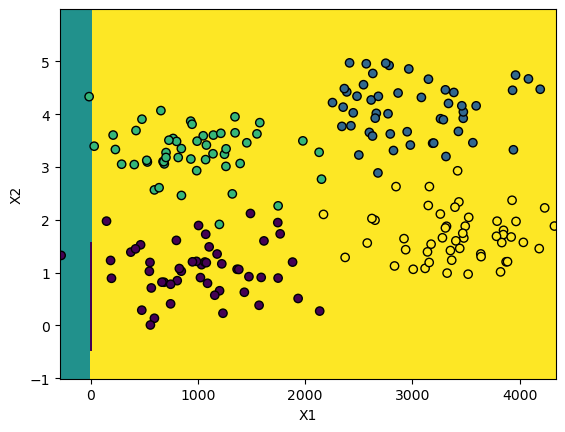

In [12]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf1.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

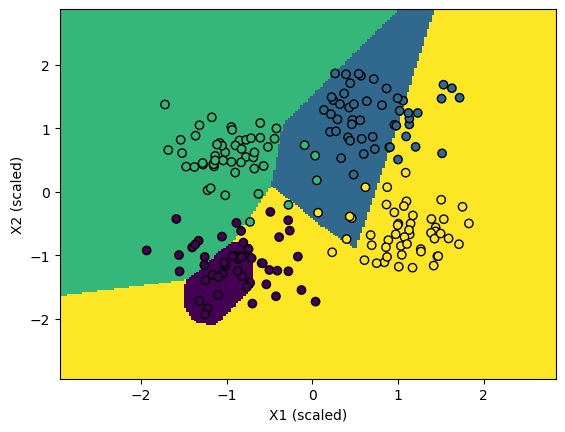

In [13]:
X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf1.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.show()

In [14]:
clf = MLPClassifier(hidden_layer_sizes=(6,), max_iter=10_000, verbose=True).fit(X_scaled, y)

Iteration 1, loss = 1.47928182
Iteration 2, loss = 1.47605111
Iteration 3, loss = 1.47283542
Iteration 4, loss = 1.46963490
Iteration 5, loss = 1.46644980
Iteration 6, loss = 1.46328042
Iteration 7, loss = 1.46012717
Iteration 8, loss = 1.45699490
Iteration 9, loss = 1.45388691
Iteration 10, loss = 1.45079681
Iteration 11, loss = 1.44772401
Iteration 12, loss = 1.44466844
Iteration 13, loss = 1.44162989
Iteration 14, loss = 1.43860859
Iteration 15, loss = 1.43560410
Iteration 16, loss = 1.43261731
Iteration 17, loss = 1.42965655
Iteration 18, loss = 1.42671390
Iteration 19, loss = 1.42379995
Iteration 20, loss = 1.42091671
Iteration 21, loss = 1.41805591
Iteration 22, loss = 1.41521394
Iteration 23, loss = 1.41239612
Iteration 24, loss = 1.40959853
Iteration 25, loss = 1.40682529
Iteration 26, loss = 1.40407054
Iteration 27, loss = 1.40133451
Iteration 28, loss = 1.39861741
Iteration 29, loss = 1.39591768
Iteration 30, loss = 1.39324058
Iteration 31, loss = 1.39058339
Iteration 32, los

Iteration 377, loss = 0.76329561
Iteration 378, loss = 0.76156668
Iteration 379, loss = 0.75984006
Iteration 380, loss = 0.75811476
Iteration 381, loss = 0.75639220
Iteration 382, loss = 0.75467218
Iteration 383, loss = 0.75295528
Iteration 384, loss = 0.75124157
Iteration 385, loss = 0.74953127
Iteration 386, loss = 0.74782122
Iteration 387, loss = 0.74611238
Iteration 388, loss = 0.74440745
Iteration 389, loss = 0.74270561
Iteration 390, loss = 0.74100695
Iteration 391, loss = 0.73931154
Iteration 392, loss = 0.73761980
Iteration 393, loss = 0.73593147
Iteration 394, loss = 0.73424661
Iteration 395, loss = 0.73256525
Iteration 396, loss = 0.73088744
Iteration 397, loss = 0.72921327
Iteration 398, loss = 0.72754231
Iteration 399, loss = 0.72587498
Iteration 400, loss = 0.72421128
Iteration 401, loss = 0.72255124
Iteration 402, loss = 0.72089488
Iteration 403, loss = 0.71924224
Iteration 404, loss = 0.71759334
Iteration 405, loss = 0.71594798
Iteration 406, loss = 0.71430591
Iteration 

In [15]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  1,  0, 49]], dtype=int64)

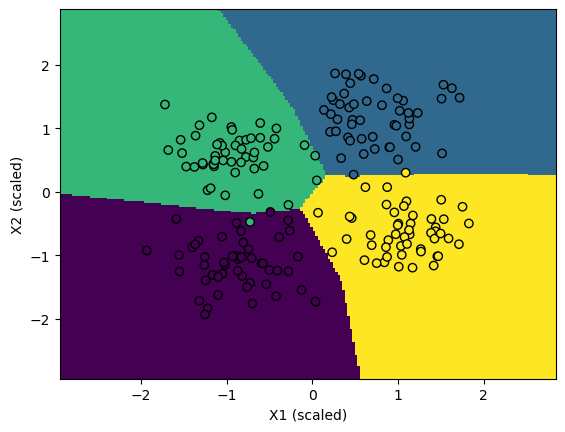

In [17]:
X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.show()

In [18]:
clf = MLPClassifier(hidden_layer_sizes=(6, 6, 6), max_iter=10_000).fit(X_scaled, y)

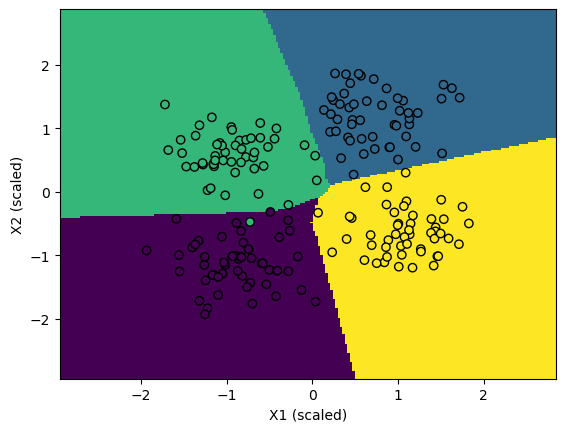

In [20]:
X0 = np.linspace(X_scaled[:, 0].min()-1, X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1, X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(), X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='black', linewidth=1)
plt.xlabel('X1 (scaled)')
plt.ylabel('X2 (scaled)')
plt.show()

In [21]:
confusion_matrix(y, clf.predict(X_scaled))

array([[50,  0,  0,  0],
       [ 0, 50,  0,  0],
       [ 1,  0, 49,  0],
       [ 0,  0,  0, 50]], dtype=int64)